<a href="https://colab.research.google.com/github/NastiiaKoval/Koval_CDVS/blob/main/koval_hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark==3.0.1 py4j==0.10.9

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local[*]")\
        .appName('PySpark_Tutorial')\
        .getOrCreate()

1. Прочитайте CSV файл

In [24]:
path = "/content/bestsellers with categories.csv"
data = spark.read.csv(path, header=True, inferSchema=True)

2.  Вивести схему даних за допомогою PrintSchema.

In [25]:
data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



In [26]:
 from pyspark.sql.types import *

In [43]:
data_schema = [
 StructField('Name', StringType(), True),
 StructField('Author', StringType(), True),
 StructField('User Rating', DoubleType(), True),
 StructField('Reviews', IntegerType(), True),
 StructField('Price', IntegerType(), True),
 StructField('Year', IntegerType(), True),
 StructField('Genre', StringType(), True)
 ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
 path,
 sep=',',
 header=True,
 schema=final_struc
)

data.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Author: string (nullable = true)
 |-- User Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Genre: string (nullable = true)



3. Вивести назви стовпців і типи даних за допомогою dtypes

In [44]:
data.dtypes

[('Name', 'string'),
 ('Author', 'string'),
 ('User Rating', 'double'),
 ('Reviews', 'int'),
 ('Price', 'int'),
 ('Year', 'int'),
 ('Genre', 'string')]

4. Виведіть перші п'ять рядків (використовується метод head)

In [45]:
data.head(5)

[Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction'),
 Row(Name='11/22/63: A Novel', Author='Stephen King', User Rating=4.6, Reviews=2052, Price=22, Year=2011, Genre='Fiction'),
 Row(Name='12 Rules for Life: An Antidote to Chaos', Author='Jordan B. Peterson', User Rating=4.7, Reviews=18979, Price=15, Year=2018, Genre='Non Fiction'),
 Row(Name='1984 (Signet Classics)', Author='George Orwell', User Rating=4.7, Reviews=21424, Price=6, Year=2017, Genre='Fiction'),
 Row(Name='5,000 Awesome Facts (About Everything!) (National Geographic Kids)', Author='National Geographic Kids', User Rating=4.8, Reviews=7665, Price=12, Year=2019, Genre='Non Fiction')]

5. Вивести перший рядок за допомогою first()

In [46]:
data.first()

Row(Name='10-Day Green Smoothie Cleanse', Author='JJ Smith', User Rating=4.7, Reviews=17350, Price=8, Year=2016, Genre='Non Fiction')

6. Зробіть опис датасету за допомогою describe()

In [47]:
data.describe()

DataFrame[summary: string, Name: string, Author: string, User Rating: string, Reviews: string, Price: string, Year: string, Genre: string]

In [48]:
# Опис для всіх стовпців
df.summary().show()

+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|summary|                Name|          Author|        User Rating|           Reviews|             Price|              Year|      Genre|
+-------+--------------------+----------------+-------------------+------------------+------------------+------------------+-----------+
|  count|                 550|             550|                550|               550|               550|               550|        550|
|   mean|                null|            null|  4.618363636363641|11953.281818181818|              13.1|            2014.0|       null|
| stddev|                null|            null|0.22698036502519656|11731.132017431892|10.842261978422364|3.1651563841692782|       null|
|    min|"The Plant Parado...|Abraham Verghese|                3.3|                37|                 0|              2009|    Fiction|
|    25%|                null|           

7.Виведіть список стовпців за допомогою columns()

In [49]:
data.columns

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

8.  Виведіть загальну кількість рядків даних за допомогою count()

In [50]:
data.count()

550

9. Перевірте, чи у всіх рядків вистачає даних. Якщо є пропуски, замінить
їх на NaN, потім тип даних на числовий.


In [53]:
from pyspark.sql.functions import isnan, when, count, col

In [54]:
# Отримати кількість пропущених значень для кожного стовпця
missing_counts = data.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data.columns])

# Вивести кількість пропущених значень для кожного стовпця
missing_counts.show()

+----+------+-----------+-------+-----+----+-----+
|Name|Author|User Rating|Reviews|Price|Year|Genre|
+----+------+-----------+-------+-----+----+-----+
|   0|     0|          0|      0|    0|   0|    0|
+----+------+-----------+-------+-----+----+-----+



Пропусків немає, тому непотрібно заміняти

10. Замініть комірки з пропущеними значенями на середні за стовпцем. І
тип даних на float.

Про скільки книг зберігає дані датасет?

In [60]:
num_row = data.count()

print(f"Кількість рядків в датасеті: {num_row}")

Кількість рядків в датасеті: 550


In [59]:
# Отримати кількість унікальних книг
nunique_books = data.select("Name").distinct().count()

# Вивести інформацію про унікальні книги
print(f"У датасеті інформація про {nunique_books} унікальну книгу")

У датасеті інформація про 351 унікальну книгу


11. Змініть назви всіх колонок: назва з маленької букви, без пробілів через
підкреслення.


In [67]:
for column in data.columns:
    new_column_name = column.lower().replace(' ', '_')
    data = data.withColumnRenamed(column, new_column_name)

# Перевіряємо нові назви
data.columns

['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

12. Знайдіть автора з найвищим рейтингом

In [69]:
from pyspark.sql.functions import desc

author_with_highest_rating = data.orderBy(desc("user_rating")).select("author").first()

print(f"Автор з найвищим рейтингом: {author_with_highest_rating['author']}")

Автор з найвищим рейтингом: Bill Martin Jr.


13. Знайдіть автора з найнижчим рейтингом

In [73]:
from pyspark.sql.functions import asc

author_with_lowest_rating = data.orderBy(asc("user_rating")).select("author").first()

print(f"Автор з найнижчим рейтингом: {author_with_lowest_rating['author']}")

Автор з найнижчим рейтингом: J.K. Rowling


14. Знайдіть автора, що має найбільшу кількіть рецензій.

In [74]:
author_with_most_reviews = data.orderBy(desc("reviews")).select("author").first()

print(f"Автор з найбільшою кількістю рецензій: {author_with_most_reviews['author']}")

Автор з найбільшою кількістю рецензій: Delia Owens


15. Побудуйте гістограму рейтингу 10 найкращих книг (відібрати книги з
найбільшим рейтингом).

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

+--------------------+--------------------+-----------+-------+-----+----+-----------+
|                name|              author|user_rating|reviews|price|year|      genre|
+--------------------+--------------------+-----------+-------+-----+----+-----------+
|Dog Man and Cat K...|          Dav Pilkey|        4.9|   5062|    6|2018|    Fiction|
|Hamilton: The Rev...|  Lin-Manuel Miranda|        4.9|   5867|   54|2016|Non Fiction|
|Dog Man: A Tale o...|          Dav Pilkey|        4.9|   4786|    8|2017|    Fiction|
|Brown Bear, Brown...|     Bill Martin Jr.|        4.9|  14344|    5|2017|    Fiction|
|Dog Man: Brawl of...|          Dav Pilkey|        4.9|   7235|    4|2018|    Fiction|
|Dog Man: For Whom...|          Dav Pilkey|        4.9|   9089|    8|2019|    Fiction|
|Dog Man: Lord of ...|          Dav Pilkey|        4.9|   5470|    6|2018|    Fiction|
|Brown Bear, Brown...|     Bill Martin Jr.|        4.9|  14344|    5|2019|    Fiction|
|Goodnight, Goodni...|Sherri Duskey Rinker|

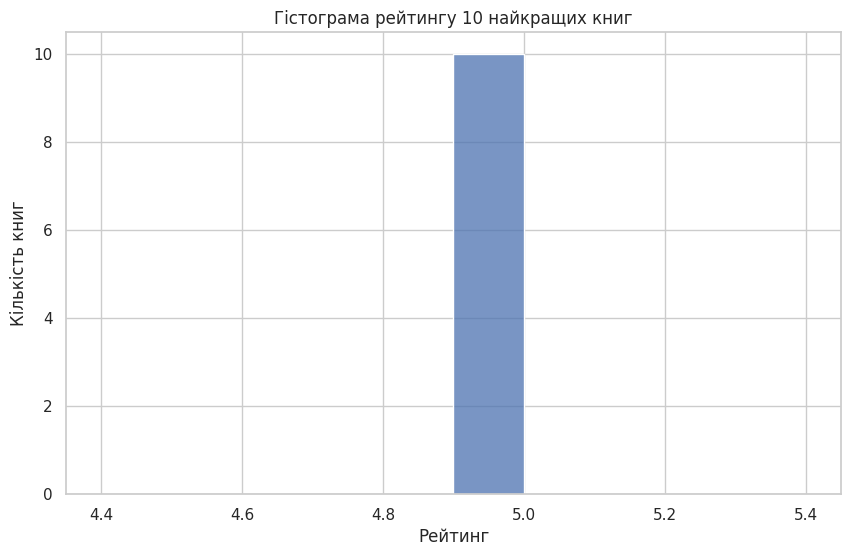

In [78]:
# Відбираємо книги з найвищим рейтингом
top_books = data.orderBy(desc("user_rating")).limit(10)
top_books.show()

# Побудувати гістограму
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
histogram = sns.histplot(data=top_books.toPandas(), x='user_rating', bins=10, kde=False)
plt.title('Гістограма рейтингу 10 найкращих книг')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість книг')
plt.show()

16. Побудуйте матрицю кореляції для стовпчиків 'user_rating', 'reviews',
'price'.**Текст, выделенный полужирным шрифтом**

In [82]:
# Відібрати необхідні стовпці
selected_columns = ['user_rating', 'reviews', 'price']
selected_df = data.select(selected_columns)

# Переводимо дані на Pandas
pandas_df = selected_df.toPandas()

# Будуємо матрицю кореляції
correlation_matrix = pandas_df.corr(method='pearson')

# Вивести результат
print("Матриця кореляції:")
print(correlation_matrix)

Матриця кореляції:
             user_rating   reviews     price
user_rating     1.000000 -0.001729 -0.133086
reviews        -0.001729  1.000000 -0.109182
price          -0.133086 -0.109182  1.000000


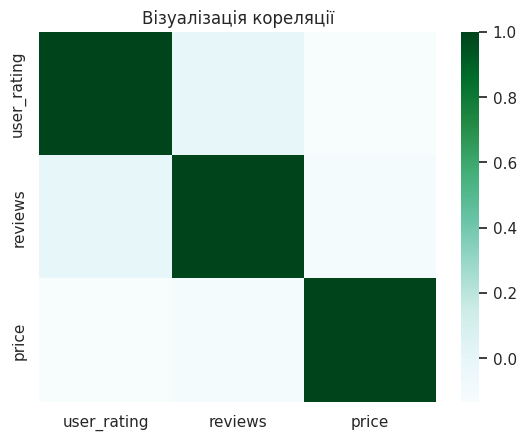

In [86]:
sns.heatmap(pandas_df.corr(), cmap='BuGn')
plt.title("Візуалізація кореляції");